# Distributed Representations of Sentences and Documents
# 句子和文档的分布式表示

# Abstract

# 摘要



Many machine learning algorithms require the input to be represented as a fixed-length feature vector. When it comes to texts, one of the most common fixed-length features is bag-of-words. Despite their popularity, bag-of-words features have two major weaknesses: they lose the ordering of the words and they also ignore semantics of the words. For example, “powerful,” “strong” and “Paris” are equally distant. In this paper, we propose Paragraph Vector, an unsupervised algorithm that learns fixed-length feature representations from variable-length pieces of texts, such as sentences, paragraphs, and documents. Our algorithm represents each document by a dense vector which is trained to predict words in the document. Its construction gives our algorithm the potential to overcome the weaknesses of bag-of-words models. Empirical results show that Paragraph Vectors outperform bag-of-words models as well as other techniques for text representations. Finally, we achieve new state-of-the-art results on several text classification and sentiment analysis tasks.

许多机器学习算法要求输入以固定长度的特征向量表示。在文本中，最常见的固定长度特征之一是词袋。尽管单词袋的特性很流行，但它们有两个主要的缺点:它们失去了单词的顺序，而且它们还忽略了单词的语义。例如，“powerful”、“strong”和“Paris”的距离一样远。在本文中，我们提出了一种无监督的段落向量算法，它从可变长度的文本片段(如句子、段落和文档)中学习固定长度的特征表示。我们的算法通过密集向量来表示每个文档，密集向量被训练来预测文档中的单词。它的构造使我们的算法有可能克服词袋模型的缺点。实验结果表明，段向量在文本表示方面优于词袋模型和其他技术。最后，我们在几个文本分类和情绪分析任务上取得了最新的结果。

# 1. Introduction

# 1. 介绍



Text classification and clustering play an important role in many applications, e.g, document retrieval, web search, spam filtering. At the heart of these applications is machine learning algorithms such as logistic regression or Kmeans. These algorithms typically require the text input to be represented as a fixed-length vector. Perhaps the most common fixed-length vector representation for texts is the bag-of-words or bag-of-n-grams (Harris, 1954) due to its simplicity, efficiency and often surprising accuracy.

文本分类和聚类在许多应用中发挥着重要的作用。文件检索，网页搜索，垃圾邮件过滤。这些应用的核心是机器学习算法，如logistic回归或Kmeans。这些算法通常要求文本输入表示为固定长度的向量。也许对于文本来说，最常见的固定长度向量表示是单词袋或n-gram袋(Harris, 1954)，这是因为它简单、高效，而且常常具有惊人的准确性。



However, the bag-of-words (BOW) has many disadvantages. The word order is lost, and thus different sentences can have exactly the same representation, as long as the same words are used. Even though bag-of-n-grams considers the word order in short context, it suffers from data sparsity and high dimensionality. Bag-of-words and bagof-n-grams have very little sense about the semantics of the words or more formally the distances between the words. This means that words “powerful,” “strong” and “Paris” are equally distant despite the fact that semantically, “powerful” should be closer to “strong” than “Paris.”

然而，词袋(BOW)有很多缺点。失去了词序，因此不同的句子可以有完全相同的表示，只要使用相同的词。尽管n-gram袋在短上下文中考虑词序，但它存在数据稀疏性和高维性问题。单词袋和n-gram袋对单词的语义或更正式的单词之间的距离几乎没有意义。这意味着单词“powerful”，“strong”和“Paris”的距离是一样的，尽管从语义上来说，“powerful”应该比“Paris”更接近“strong”。



In this paper, we propose Paragraph Vector, an unsupervised framework that learns continuous distributed vector representations for pieces of texts. The texts can be of variable-length, ranging from sentences to documents. The name Paragraph Vector is to emphasize the fact that the method can be applied to variable-length pieces of texts, anything from a phrase or sentence to a large document.

在本文中，我们提出了一种无监督的段向量框架，它学习了文本片段的连续分布向量表示。文本可以是可变的长度，从句子到文档。段向量是为了强调这样一个事实，即该方法可以应用于长度可变的文本片段，从短语或句子到大型文档的任何内容。



In our model, the vector representation is trained to be useful for predicting words in a paragraph. More precisely, we concatenate the paragraph vector with several word vectors from a paragraph and predict the following word in the given context. Both word vectors and paragraph vectors are trained by the stochastic gradient descent and backpropagation (Rumelhart et al., 1986). While paragraph vectors are unique among paragraphs, the word vectors are shared. At prediction time, the paragraph vectors are inferred by fixing the word vectors and training the new paragraph vector until convergence.

在我们的模型中，向量表示被训练用于预测段落中的单词。更准确地说，我们将段落向量与某个段落中的几个单词向量连接起来，并在给定的上下文中预测接下来的单词。单词向量和段落向量都是通过随机梯度下降和反向传播训练的(Rumelhart et al.， 1986)。段落向量在段落中是唯一的，但是单词向量是共享的。在预测时，通过固定单词向量并训练新的段落向量直到收敛来推导段落向量。



Our technique is inspired by the recent work in learning vector representations of words using neural networks (Bengio et al., 2006; Collobert & Weston, 2008; Mnih & Hinton, 2008; Turian et al., 2010; Mikolov et al., 2013a;c). In their formulation, each word is represented by a vector which is concatenated or averaged with other word vectors in a context, and the resulting vector is used to predict other words in the context. For example, the neural network language model proposed in (Bengio et al., 2006) uses the concatenation of several previous word vectors to form the input of a neural network, and tries to predict the next word. The outcome is that after the model is trained, the word vectors are mapped into a vector space such that semantically similar words have similar vector representations (e.g., “strong” is close to “powerful”).

我们的技术受到最近使用神经网络学习单词向量表示的工作的启发(Bengio et al.， 2006;Collobert & Weston, 2008;Mnih & Hinton, 2008;Turian等，2010年;Mikolov等，2013a;c)。在它们的公式中，每个单词都由一个向量表示，这个向量与上下文中的其他单词向量连接或平均，得到的向量用于预测上下文中的其他单词。例如，在(Bengio et al.， 2006)中提出的神经网络语言模型使用前几个单词向量的串联来构成神经网络的输入，并尝试预测下一个单词。结果是，在模型训练完成后，单词向量被映射到一个向量空间中，这样语义上相似的单词有相似的向量表示(例如，“strong”接近于“powerful”)。



Following these successful techniques, researchers have tried to extend the models to go beyond word level to achieve phrase-level or sentence-level representations (Mitchell & Lapata, 2010; Zanzotto et al., 2010; Yessenalina & Cardie, 2011; Grefenstette et al., 2013; Mikolov et al., 2013c). For instance, a simple approach is using a weighted average of all the words in the document. A more sophisticated approach is combining the word vectors in an order given by a parse tree of a sentence, using matrix-vector operations (Socher et al., 2011b). Both approaches have weaknesses. The first approach, weighted averaging of word vectors, loses the word order in the same way as the standard bag-of-words models do. The second approach, using a parse tree to combine word vectors, has been shown to work for only sentences because it relies on parsing.

在这些成功的技术之后，研究人员试图扩展模型，使其超越词级，达到短语级或句子级表示(Mitchell & Lapata, 2010;赞佐托等人，2010年;Yessenalina & Cardie出版社，2011年;Grefenstette等人，2013年;Mikolov等，2013c)。例如，一种简单的方法是使用文档中所有单词的加权平均值。一种更复杂的方法是使用矩阵向量操作，将单词向量按照句子的解析树给出的顺序组合在一起(Socher等，2011b)。这两种方法都有缺点。第一种方法是单词向量的加权平均，它会像标准的单词包模型那样丢失单词顺序。第二种方法使用解析树来组合单词向量，它只对句子有效，因为它依赖于解析。



Paragraph Vector is capable of constructing representations of input sequences of variable length. Unlike some of the previous approaches, it is general and applicable to texts of any length: sentences, paragraphs, and documents. It does not require task-specific tuning of the word weighting function nor does it rely on the parse trees. Further in the paper, we will present experiments on several benchmark datasets that demonstrate the advantages of Paragraph Vector. For example, on sentiment analysis task, we achieve new stateof-the-art results, better than complex methods, yielding a relative improvement of more than 16% in terms of error rate. On a text classification task, our method convincingly beats bag-of-words models, giving a relative improvement of about 30%.

段落向量能够构造可变长度输入序列的表示。与前面的一些方法不同，它是通用的，适用于任何长度的文本:句子、段落和文档。它不需要对单词权重函数进行特定于任务的调优，也不依赖于解析树。接下来，我们将在几个基准数据集上进行实验，以证明段落向量的优点。例如，在情感分析任务上，我们取得了最新的结果，优于复杂的方法，错误率相对提高了16%以上。在一个文本分类任务上，我们的方法令人信服地击败了词袋模型，相对提高了约30%。

# 2. Algorithms

# 2. 算法



We start by discussing previous methods for learning word vectors. These methods are the inspiration for our Paragraph Vector methods.

我们从讨论以前学习单词向量的方法开始。这些方法是我们的段落向量方法的灵感。





## 2.1. Learning Vector Representation of Words

## 2.1。学习单词的向量表示



This section introduces the concept of distributed vector representation of words. A well known framework for learning the word vectors is shown in Figure 1. The task is to predict a word given the other words in a context.

本节介绍单词的分布式向量表示的概念。图1显示了学习单词向量的一个众所周知的框架。这个任务是预测一个单词在上下文中的另一个单词。

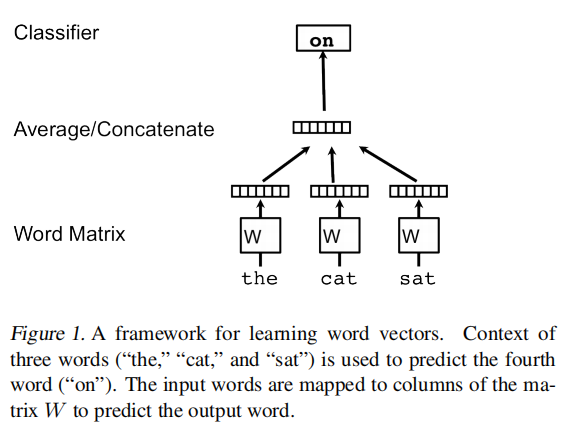

In this framework, every word is mapped to a unique vector, represented by a column in a matrix W. The column is indexed by position of the word in the vocabulary. The concatenation or sum of the vectors is then used as features for prediction of the next word in a sentence.

在这个框架中，每个单词被映射到一个唯一的向量，由矩阵W中的一列表示。该列根据单词在词汇表中的位置建立索引。然后，连接或求和这些向量，用作预测句子中下一个单词的特征。



More formally, given a sequence of training words w1, w2, w3, ..., wT , the objective of the word vector model is to maximize the average log probability

更正式地说，给定一系列训练词w1, w2, w3, ..., wT，词向量模型的目标是使平均对数概率最大化

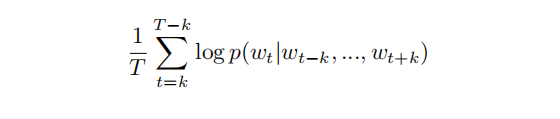

The prediction task is typically done via a multiclass classifier, such as softmax. There, we have

预测任务通常是通过一个多类分类器来完成的，比如softmax。在那里,我们有

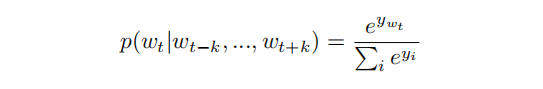

Each of yi is un-normalized log-probability for each output word i, computed as 

每个yi对于每个输出词i是非标准化的对数概率，计算为

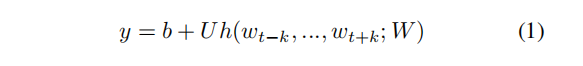

where U, b are the softmax parameters. h is constructed by a concatenation or average of word vectors extracted from W.

其中U, b是softmax参数。h是由从W中提取的词向量的连接或平均值构成的。



In practice, hierarchical softmax (Morin & Bengio, 2005;Mnih & Hinton, 2008; Mikolov et al., 2013c) is preferred to softmax for fast training. In our work, the structure of the hierarical softmax is a binary Huffman tree, where short codes are assigned to frequent words. This is a good speedup trick because common words are accessed quickly. This use of binary Huffman code for the hierarchy is the same with (Mikolov et al., 2013c).


在实践中，分层softmax (Morin & Bengio, 2005;Mnih & Hinton, 2008;Mikolov等人，2013c)在快速训练方面，首选softmax。在我们的工作中，层次softmax的结构是一个二进霍夫曼树，其中短代码分配给频繁的词。这是一个很好的加速技巧，因为常用的单词可以快速访问。这种使用二进制霍夫曼编码的层次结构是相同的(Mikolov et al.， 2013c)。



The neural network based word vectors are usually trained using stochastic gradient descent where the gradient is obtained via backpropagation (Rumelhart et al., 1986). This type of models is commonly known as neural language models (Bengio et al., 2006). A particular implementation of neural network based algorithm for training the word vectors is available at code.google.com/p/word2vec/ (Mikolov et al., 2013a).

基于神经网络的词向量通常使用随机梯度下降进行训练，其中梯度通过反向传播获得(Rumelhart et al.， 1986)。这类模型通常被称为神经语言模型(Bengio et al.， 2006)。训练单词向量的神经网络算法的一个特殊实现可以在code.google.com/p/word2vec/ (Mikolov et al.， 2013a)获得。



After the training converges, words with similar meaning are mapped to a similar position in the vector space. For example, “powerful” and “strong” are close to each other, whereas “powerful” and “Paris” are more distant. The difference between word vectors also carry meaning. For example, the word vectors can be used to answer analogy questions using simple vector algebra: “King” - “man” + “woman” = “Queen” (Mikolov et al., 2013d). It is also possible to learn a linear matrix to translate words and phrases between languages (Mikolov et al., 2013b).

训练收敛后，将意义相似的单词映射到向量空间中的相似位置。例如，“powerful”和“strong”的距离较近，而“powerful”和“Paris”的距离较远。单词向量之间的差异也具有意义。例如，单词向量可以用简单的向量代数回答类比问题:“King”-“man”+“woman”=“Queen”(Mikolov et al.， 2013d)。也可以学习一个线性矩阵来在语言之间翻译单词和短语(Mikolov et al.， 2013b)。



These properties make word vectors attractive for many natural language processing tasks such as language modeling (Bengio et al., 2006; Mikolov, 2012), natural language understanding (Collobert & Weston, 2008; Zhila et al., 2013), statistical machine translation (Mikolov et al., 2013b; Zou et al., 2013), image understanding (Frome et al., 2013) and relational extraction (Socher et al., 2013a).

这些特性使得单词向量对于许多自然语言处理任务(如语言建模)具有吸引力(Bengio et al.， 2006;Mikolov, 2012)，自然语言理解(Collobert & Weston, 2008;Zhila等，2013)，统计机器翻译(Mikolov等，2013b;邹等，2013)，图像理解(Frome等，2013)和关系提取(Socher等，2013)。





## 2.2. Paragraph Vector: A distributed memory model

## 2.2 段向量:分布式内存模型



Our approach for learning paragraph vectors is inspired by the methods for learning the word vectors. The inspiration is that the word vectors are asked to contribute to a prediction task about the next word in the sentence. So despite the fact that the word vectors are initialized randomly, they can eventually capture semantics as an indirect result of the prediction task. We will use this idea in our paragraph vectors in a similar manner. The paragraph vectors are also asked to contribute to the prediction task of the next word given many contexts sampled from the paragraph.

我们学习段落向量的方法是受到学习单词向量方法的启发。灵感来自于单词向量被要求参与一个关于句子中下一个单词的预测任务。因此，尽管单词向量是随机初始化的，但作为预测任务的间接结果，它们最终可以捕获语义。我们将以类似的方式在段落向量中使用这个概念。段落向量也被要求对下一个单词的预测任务作出贡献，给定从该段落中取样的许多上下文。

In our Paragraph Vector framework (see Figure 2), every paragraph is mapped to a unique vector, represented by a column in matrix D and every word is also mapped to a unique vector, represented by a column in matrix W. The paragraph vector and word vectors are averaged or concatenated to predict the next word in a context. In the experiments, we use concatenation as the method to combine the vectors.

在段落向量框架(见图2),每一段映射到一个独特的向量,由一列矩阵D和每一个字也映射到一个独特的向量,由一列矩阵W.段落向量和词向量的平均或连接在一个上下文预测下一个单词。在实验中，我们采用了连接的方法来组合矢量。

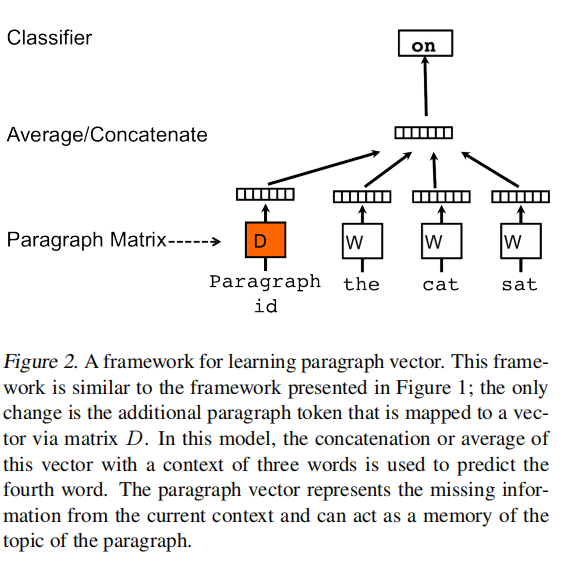

More formally, the only change in this model compared to the word vector framework is in equation 1, where h is constructed from W and D.

更正式地说，这个模型与单词向量框架相比唯一的变化是在等式1，其中h是由W和D构造的。



The paragraph token can be thought of as another word. It acts as a memory that remembers what is missing from the current context – or the topic of the paragraph. For this reason, we often call this model the Distributed Memory Model of Paragraph Vectors (PV-DM).

段落标记可以看作是另一个单词。它起到了记忆的作用，可以记住当前上下文缺少的内容——或者段落的主题。因此，我们通常称这种模型为段落向量的分布式内存模型(PV-DM)。



The contexts are fixed-length and sampled from a sliding window over the paragraph. The paragraph vector is shared across all contexts generated from the same paragraph but not across paragraphs. The word vector matrix W, however, is shared across paragraphs. I.e., the vector for “powerful” is the same for all paragraphs.

上下文是固定长度的，并从段落上的滑动窗口中采样。段落矢量可以在同一段落中生成的所有上下文之间共享，但不能在段落之间共享。但是，向量矩阵W是跨段落共享的。即。，“强大”的向量对于所有段落都是一样的。



The paragraph vectors and word vectors are trained using stochastic gradient descent and the gradient is obtained via backpropagation. At every step of stochastic gradient descent, one can sample a fixed-length context from a random paragraph, compute the error gradient from the network in Figure 2 and use the gradient to update the parameters in our model.

采用随机梯度下降法训练段落向量和单词向量，通过反向传播得到梯度。在随机梯度下降的每一步中，我们可以从随机段落中抽取固定长度的上下文，从图2中的网络中计算误差梯度，并使用梯度更新我们模型中的参数。



At prediction time, one needs to perform an inference step to compute the paragraph vector for a new paragraph. This is also obtained by gradient descent. In this step, the parameters for the rest of the model, the word vectors W and the softmax weights, are fixed.

在预测时，需要执行推断步骤来计算新段落的段落向量。这也是通过梯度下降得到的。在这一步中，模型其余部分的参数，单词向量W和softmax权重是固定的。



Suppose that there are N paragraphs in the corpus, M words in the vocabulary, and we want to learn paragraph vectors such that each paragraph is mapped to p dimensions and each word is mapped to q dimensions, then the model has the total of N × p + M × q parameters (excluding the softmax parameters). Even though the number of parameters can be large when N is large, the updates during training are typically sparse and thus efficient.

假设有N个段落语料库,M个词在词汇表中,我们想了解段落向量,这样每一段映射到p维度和映射到每个单词的维度,那么模型的总 N × p + M × q参数(不含将softmax参数)。尽管N大时参数的数量可能很大，但训练时的更新通常是稀疏的，因此效率很高。



After being trained, the paragraph vectors can be used as features for the paragraph (e.g., in lieu of or in addition to bag-of-words). We can feed these features directly to conventional machine learning techniques such as logistic regression, support vector machines or K-means.

经过训练后，段落向量可以作为段落的特征(如代替或代替词袋)。我们可以直接将这些特征输入传统的机器学习技术，如逻辑回归、支持向量机或K-means。



In summary, the algorithm itself has two key stages: 1) training to get word vectors W, softmax weights U, b and paragraph vectors D on already seen paragraphs; and 2) “the inference stage” to get paragraph vectors D for new paragraphs (never seen before) by adding more columns in D and gradient descending on D while holding W, U, b fixed. We use D to make a prediction about some particular labels using a standard classifier, e.g., logistic regression.

总而言之，该算法本身有两个关键阶段:1)训练获得词向量W, softmax权重U, b和段落向量D对已经看到的段落;2)“推理阶段”，通过在D中添加更多的列，并保持W、U、b不变，在D上梯度下降，得到新段落的段落向量D(以前从未见过)。我们使用D对使用标准分类器的特定标签进行预测，例如logistic回归。



Advantages of paragraph vectors: An important advantage of paragraph vectors is that they are learned from unlabeled data and thus can work well for tasks that do not have enough labeled data.

段落向量的优点:段落向量的一个重要优点是它们是从未标记数据中学习的，因此可以很好地用于没有足够标记数据的任务。



Paragraph vectors also address some of the key weaknesses of bag-of-words models. First, they inherit an important property of the word vectors: the semantics of the words. In this space, “powerful” is closer to “strong” than to “Paris.” The second advantage of the paragraph vectors is that they take into consideration the word order, at least in a small context, in the same way that an n-gram model with a large n would do. This is important, because the n-gram model preserves a lot of information of the paragraph, including the word order. That said, our model is perhaps better than a bag-of-n-grams model because a bag of n-grams model would create a very high-dimensional representation that tends to generalize poorly.

段落向量还解决了词袋模型的一些关键弱点。首先，它们继承了单词向量的一个重要属性:单词的语义。在这里，“powerful”更接近“strong”，而不是“Paris”。“段落向量的第二个优点是它们考虑了词序，至少在一个小的上下文中是这样的，就像一个n元模型有一个大的n元一样。这一点很重要，因为n-gram模型保存了该段落的很多信息，包括词序。也就是说，我们的模型可能比一袋n-gram模型更好，因为一袋n-gram模型会创建一个非常高维的表示，而这往往很难推广。





## 2.3. Paragraph Vector without word ordering:Distributed bag of words

## 2.3 段落向量没有字排序:分布式词袋




The above method considers the concatenation of the paragraph vector with the word vectors to predict the next word in a text window. Another way is to ignore the context words in the input, but force the model to predict words randomly sampled from the paragraph in the output. In reality, what this means is that at each iteration of stochastic gradient descent, we sample a text window, then sample a random word from the text window and form a classifi- cation task given the Paragraph Vector. This technique is shown in Figure 3. We name this version the Distributed Bag of Words version of Paragraph Vector (PV-DBOW), as opposed to Distributed Memory version of Paragraph Vector (PV-DM) in previous section.

上述方法考虑将段落向量与单词向量连接起来，预测文本窗口中的下一个单词。另一种方法是忽略输入中的上下文单词，但强制模型预测从输出的段落中随机取样的单词。实际上，这意味着在随机梯度下降的每次迭代中，我们对一个文本窗口进行采样，然后从文本窗口中随机采样一个单词，并根据给定的段落向量形成一个分类任务。这种技术如图3所示。我们将此版本命名为段落向量的分布式单词包版本(PV-DBOW)，而不是前一节中的段落向量的分布式内存版本(PV-DM)。

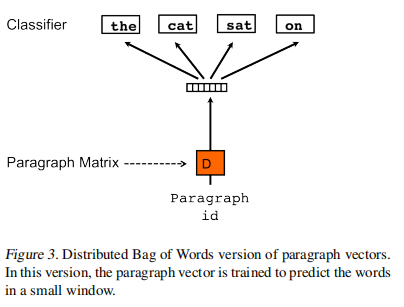

In addition to being conceptually simple, this model requires to store less data. We only need to store the softmax weights as opposed to both softmax weights and word vectors in the previous model. This model is also similar to the Skip-gram model in word vectors (Mikolov et al., 2013c).

除了概念简单之外，该模型需要存储的数据更少。我们只需要存储softmax权重，而不是softmax权重和单词向量在以前的模型。该模型也类似于单词向量中的跃格模型(Mikolov et al.， 2013c)。



In our experiments, each paragraph vector is a combination of two vectors: one learned by the standard paragraph vector with distributed memory (PV-DM) and one learned by the paragraph vector with distributed bag of words (PV-DBOW). PV-DM alone usually works well for most tasks (with state-of-art performances), but its combination with PV-DBOW is usually more consistent across many tasks that we try and therefore strongly recommended.

在我们的实验中，每个段落向量是两个向量的组合:一个是通过分布内存的标准段落向量(PV-DM)学习的，另一个是通过单词分布包的段落向量(PV-DBOW)学习的。单独的PV-DM通常可以很好地用于大多数任务(具有最新的性能)，但是它与PV-DBOW的组合通常在我们尝试的许多任务中更加一致，因此强烈推荐使用它。

# 3. Experiments

# 3.实验



We perform experiments to better understand the behavior of the paragraph vectors. To achieve this, we benchmark Paragraph Vector on two text understanding problems that require fixed-length vector representations of paragraphs: sentiment analysis and information retrieval.

我们通过实验来更好地理解段落向量的行为。为了实现这一目标，我们将两个文本理解问题作为段落向量的基准，这两个问题需要段落的固定长度向量表示:情感分析和信息检索。



For sentiment analysis, we use two datasets: Stanford sentiment treebank dataset (Socher et al., 2013b) and IMDB dataset (Maas et al., 2011). Documents in these datasets differ significantly in lengths: every example in Socher et al. (Socher et al., 2013b)’s dataset is a single sentence while every example in Maas et al. (Maas et al., 2011)’s dataset consists of several sentences.

对于情绪分析，我们使用两个数据集:Stanford sentiment treebank数据集(Socher et al.， 2013b)和IMDB数据集(Maas et al.， 2011)。这些数据集中的文档长度差异显著:Socher et al. (Socher et al.， 2013b)的数据集中的每个示例都是一个句子，而Maas et al. (Maas et al.， 2011)的数据集中的每个示例都是几个句子。



We also test our method on an information retrieval task, where the goal is to decide if a document should be retrieved given a query.

我们还在信息检索任务上测试了我们的方法，目标是决定是否应该在给定查询的情况下检索文档。

## 3.1. Sentiment Analysis with the Stanford Sentiment Treebank Dataset

## 3.1 使用Stanford Sentiment Treebank数据集进行情绪分析



Dataset: This dataset was first proposed by (Pang & Lee, 2005) and subsequently extended by (Socher et al., 2013b) as a benchmark for sentiment analysis. It has 11855 sentences taken from the movie review site Rotten Tomatoes.

Dataset:该Dataset首先由(Pang & Lee, 2005)提出，随后被(Socher et al.， 2013b)扩展，作为情绪分析的基准。其中11855句句子来自烂番茄影评网站。



The dataset consists of three sets: 8544 sentences for training, 2210 sentences for test and 1101 sentences for validation (or development).

数据集由三组句子组成:8544个用于训练的句子，2210个用于测试的句子和1101个用于验证(或开发)的句子。



Every sentence in the dataset has a label which goes from very negative to very positive in the scale from 0.0 to 1.0. The labels are generated by human annotators using Amazon Mechanical Turk.

数据集中的每个句子都有一个标签，在0.0到1.0的范围内从非常消极到非常积极。这些标签是由人类注释者使用Amazon Mechanical Turk生成的。



The dataset comes with detailed labels for sentences, and subphrases in the same scale. To achieve this, Socher et al. (Socher et al., 2013b) used the Stanford Parser (Klein & Manning, 2003) to parse each sentence to subphrases. The subphrases were then labeled by human annotators in the same way as the sentences were labeled. In total, there are 239,232 labeled phrases in the dataset. The dataset can be downloaded at: http://nlp.Stanford.edu/sentiment/

数据集提供了相同规模的句子和子短语的详细标签。为此，Socher等人(Socher et al.， 2013b)使用Stanford解析器(Klein & Manning, 2003)将每个句子解析为子短语。这些子短语随后由人类注解员按照给句子标注的方式进行标注。数据集中总共有239,232个带标签的短语。数据集可在http://nlp.Stanford.edu/sentiment/下载



Tasks and Baselines: In (Socher et al., 2013b), the authors propose two ways of benchmarking. First, one could consider a 5-way fine-grained classification task where the labels are {Very Negative, Negative, Neutral, Positive, Very Positive} or a 2-way coarse-grained classification task where the labels are {Negative, Positive}. The other axis of variation is in terms of whether we should label the entire sentence or all phrases in the sentence. In this work we only consider labeling the full sentences.

任务和基线:在(Socher et al.， 2013b)中，作者提出了两种基准测试方法。首先，我们可以考虑一个5路细粒度的分类任务，其中标签为{非常消极，消极，中性，积极，非常积极};或者一个2路粗粒度的分类任务，其中标签为{消极，积极}。变化的另一个轴是关于我们是否应该标记整个句子或句子中的所有短语。在这项工作中，我们只考虑标记完整的句子。



Socher et al. (Socher et al., 2013b) apply several methods to this dataset and find that their Recursive Neural Tensor Network works much better than bag-of-words model. It can be argued that this is because movie reviews are often short and compositionality plays an important role in deciding whether the review is positive or negative, as well as similarity between words does given the rather tiny size of the training set.

Socher et al. (Socher et al.， 2013b)将几种方法应用于该数据集，发现它们的递归神经张量网络比单词袋模型工作得更好。可以这么说，这是因为影评通常都很短，而组合性在决定影评是正面的还是负面的方面起着重要的作用，而且由于训练集的规模相当小，单词之间的相似性也确实很重要。



Experimental protocols: We follow the experimental protocols as described in (Socher et al., 2013b). To make use of the available labeled data, in our model, each subphrase is treated as an independent sentence and we learn the representations for all the subphrases in the training set.

实验协议:我们遵循(Socher et al.， 2013b)中所述的实验协议。为了利用可用的标记数据，在我们的模型中，每个子短语被视为一个独立的句子，我们学习所有子短语在训练集中的表示。



After learning the vector representations for training sentences and their subphrases, we feed them to a logistic regression to learn a predictor of the movie rating.

在学习了训练句子及其子短语的向量表示后，我们将它们输入逻辑回归来学习电影评级的预测器。



At test time, we freeze the vector representation for each word, and learn the representations for the sentences using gradient descent. Once the vector representations for the test sentences are learned, we feed them through the logistic regression to predict the movie rating.

在测试时，我们冻结每个单词的向量表示，并使用梯度下降学习句子的表示。一旦学习了测试句子的向量表示，我们就通过逻辑回归来预测电影评级。



In our experiments, we cross validate the window size using the validation set, and the optimal window size is 8. The vector presented to the classifier is a concatenation of two vectors, one from PV-DBOW and one from PV-DM. In PV-DBOW, the learned vector representations have 400 dimensions. In PV-DM, the learned vector representations have 400 dimensions for both words and paragraphs. To predict the 8-th word, we concatenate the paragraph vectors and 7 word vectors. Special characters such as ,.!? are treated as a normal word. If the paragraph has less than 9 words, we pre-pad with a special NULL word symbol.

在我们的实验中，我们使用验证集交叉验证窗口大小，最佳窗口大小为8。给出的分类器向量是两个向量的串联，一个来自PV-DBOW，一个来自PV-DM。在PV-DBOW中，学习向量表示有400维。在PV-DM中，学习向量表示对于单词和段落都有400维。为了预测第8个单词，我们将段落向量和7个单词向量连接起来。特殊字符，如，!?被当作一个正常的词来对待。如果段落少于9个单词，我们用一个特殊的空单词符号作为铺垫。



Results: We report the error rates of different methods in Table 1. The first highlight for this Table is that bag-ofwords or bag-of-n-grams models (NB, SVM, BiNB) perform poorly. Simply averaging the word vectors (in a bagof-words fashion) does not improve the results. This is because bag-of-words models do not consider how each sentence is composed (e.g., word ordering) and therefore fail to recognize many sophisticated linguistic phenomena, for instance sarcasm. The results also show that more advanced methods (such as Recursive Neural Network (Socher et al., 2013b)), which require parsing and take into account the compositionality, perform much better.

结果:我们在表1中报告了不同方法的错误率。该表的第一个亮点是词袋或n-gram袋模型(NB、SVM、BiNB)的表现不佳。简单地平均单词向量(以词袋的方式)并不能改善结果。这是因为单词袋模型没有考虑每个句子是如何组成的(例如，单词排序)，因此不能识别许多复杂的语言现象，例如讽刺。结果还表明，更高级的方法(如递归神经网络(Socher et al.， 2013b)，需要解析并考虑组合性，性能要好得多。

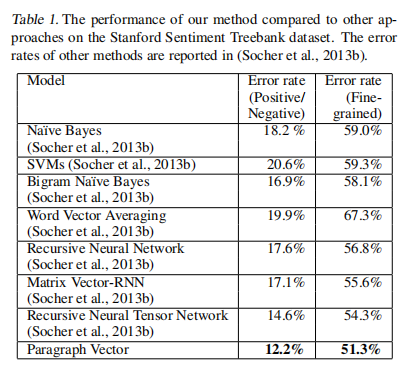


Our method performs better than all these baselines, e.g., recursive networks, despite the fact that it does not require parsing. On the coarse-grained classification task, our method has an absolute improvement of 2.4% in terms of error rates. This translates to 16% relative improvement.

尽管我们的方法不需要解析，但它的性能比所有这些基线(例如递归网络)都要好。对于粗粒度的分类任务，我们的方法在错误率方面有2.4%的绝对改进。这相当于16%的相对改善。

## 3.2. Beyond One Sentence: Sentiment Analysis with IMDB dataset

## 3.2 超越一句话:用IMDB数据集进行情感分析



Some of the previous techniques only work on sentences, but not paragraphs/documents with several sentences. For instance, Recursive Neural Tensor Network (Socher et al., 2013b) is based on the parsing over each sentence and it is unclear how to combine the representations over many sentences. Such techniques therefore are restricted to work on sentences but not paragraphs or documents.

前面的一些技巧只适用于句子，而不适用于有几个句子的段落或文档。例如，递归神经张量网络(Socher et al.， 2013b)是基于对每个句子的解析，不清楚如何结合多个句子的表示。因此，这些技巧只适用于句子，而不适用于段落或文档。



Our method does not require parsing, thus it can produce a representation for a long document consisting of many sentences. This advantage makes our method more general than some of the other approaches. The following experiment on IMDB dataset demonstrates this advantage.

我们的方法不需要解析，因此它可以为包含许多句子的长文档生成表示。这一优势使得我们的方法比其他一些方法更通用。下面在IMDB数据集上的实验演示了这一优势。



Dataset: The IMDB dataset was first proposed by Maas et al. (Maas et al., 2011) as a benchmark for sentiment analysis. The dataset consists of 100,000 movie reviews taken from IMDB. One key aspect of this dataset is that each movie review has several sentences.

数据集:IMDB数据集最初由Maas等人(Maas et al.， 2011)提出，作为情绪分析的基准。该数据集由来自IMDB的10万篇电影评论组成。这个数据集的一个关键方面是每个影评都有几句话。



The 100,000 movie reviews are divided into three datasets: 25,000 labeled training instances, 25,000 labeled test instances and 50,000 unlabeled training instances. There are two types of labels: Positive and Negative. These labels are balanced in both the training and the test set. The dataset can be downloaded at http://ai.Stanford.edu/ amaas/data/sentiment/index.html

100,000个电影评论被分成三个数据集:25,000标记的训练实例，25,000标记的测试实例和50,000未标记的训练实例。标签有两种:正面和负面。这些标签在训练集和测试集都是平衡的。数据集可以在http://ai.stanford.edu/amaas /data/sentiment/index.html下载



Experimental protocols: We learn the word vectors and paragraph vectors using 75,000 training documents (25,000 labeled and 50,000 unlabeled instances). The paragraph vectors for the 25,000 labeled instances are then fed through a neural network with one hidden layer with 50 units and a logistic classifier to learn to predict the sentiment.1

实验协议:我们使用75,000个训练文档(25,000标记实例和50,000未标记实例)学习单词向量和段落向量。然后，25000个标记实例的段落向量通过一个隐含层50个单元的神经网络和一个逻辑分类器来学习预测情绪



At test time, given a test sentence, we again freeze the rest of the network and learn the paragraph vectors for the test reviews by gradient descent. Once the vectors are learned, we feed them through the neural network to predict the sentiment of the reviews.

在测试时，给定一个测试句子，我们再次冻结网络的其余部分，并通过梯度下降学习用于测试复习的段落向量。一旦这些向量被学习，我们就可以通过神经网络来预测评论的情绪。



The hyperparameters of our paragraph vector model are selected in the same manner as in the previous task. In particular, we cross validate the window size, and the optimal window size is 10 words. The vector presented to the classifier is a concatenation of two vectors, one from PV-DBOW and one from PV-DM. In PV-DBOW, the learned vector representations have 400 dimensions. In PV-DM, the learned vector representations have 400 dimensions for both words and documents. To predict the 10-th word, we concatenate the paragraph vectors and word vectors. Special characters such as ,.!? are treated as a normal word. If the document has less than 9 words, we pre-pad with a special NULL word symbol.

我们的段落向量模型的超参数的选择方式与上一个任务相同。特别是，我们交叉验证窗口大小，最佳窗口大小为10个单词。给出的分类器向量是两个向量的串联，一个来自PV-DBOW，一个来自PV-DM。在PV-DBOW中，学习向量表示有400维。在PV-DM中，学习到的向量表示对于单词和文档都有400维。为了预测第10个单词，我们将段落向量和单词向量连接起来。特殊字符，如，!?被当作一个正常的词来对待。如果文档有少于9个单词，我们用一个特殊的空单词符号来填充。



Results: The results of Paragraph Vector and other baselines are reported in Table 2. As can be seen from the Table, for long documents, bag-of-words models perform quite well and it is difficult to improve upon them using word vectors. The most significant improvement happened in 2012 in the work of (Dahl et al., 2012) where they combine a Restricted Boltzmann Machines model with bag-ofwords. The combination of two models yields an improvement approximately 1.5% in terms of error rates.

结果:表2报告了段落向量和其他基线的结果。从表中可以看出，对于长文档，单词包模型的性能非常好，很难使用单词向量对其进行改进。最显著的改进发生在2012年(Dahl et al.， 2012)的工作中，他们将受限玻尔兹曼机器模型与袋装词相结合。两种模型的结合产生了大约1.5%的错误率改进。

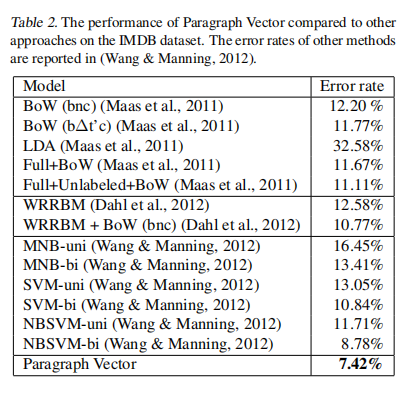

Another significant improvement comes from the work of (Wang & Manning, 2012). Among many variations they tried, NBSVM on bigram features works the best and yields a considerable improvement of 2% in terms of the error rate.

另一个显著的改进来自于(Wang & Manning, 2012)的工作。在他们尝试的许多变体中，基于bigram特征的NBSVM效果最好，错误率提高了2%。



The method described in this paper is the only approach that goes significantly beyond the barrier of 10% error rate.

本文所描述的方法是唯一明显超过10%错误率障碍的方法。



It achieves 7.42% which is another 1.3% absolute improvement (or 15% relative improvement) over the best previous result of (Wang & Manning, 2012)

达到7.42%，比之前的最好成绩(Wang & Manning, 2012)又提高了1.3%绝对(或15%相对)

## 3.3. Information Retrieval with Paragraph Vectors

## 3.3 段落向量的信息检索



We turn our attention to an information retrieval task which requires fixed-length representations of paragraphs.

我们将注意力转向一个信息检索任务，它需要固定长度的表示段落。



Here, we have a dataset of paragraphs in the first 10 results returned by a search engine given each of 1,000,000 most popular queries. Each of these paragraphs is also known as a “snippet” which summarizes the content of a web page and how a web page matches the query.

在这里，我们有一个由搜索引擎返回的前10个结果的段落数据集，每个结果都包含1,000,000个最流行的查询。这些段落也被称为“片段”，它总结了网页的内容以及网页如何匹配查询。



From such collection, we derive a new dataset to test vector representations of paragraphs. For each query, we create a triplet of paragraphs: the two paragraphs are results of the same query, whereas the third paragraph is a randomly sampled paragraph from the rest of the collection (returned as the result of a different query). Our goal is to identify which of the three paragraphs are results of the same query. To achieve this, we will use paragraph vectors and compute the distances the paragraphs. A better representation is one that achieves a small distance for pairs of paragraphs of the same query and a larg distance for pairs of paragraphs of different queries.

从这样的集合，我们推出一个新的数据集，以测试矢量表示的段落。对于每个查询，我们创建一个三联体的段落:这两个段落是同一个查询的结果，而第三个段落是从集合的其余部分(作为不同查询的结果返回)中随机取样的段落。我们的目标是确定这三个段落中哪一个是同一个查询的结果。为了实现这一点，我们将使用段落向量并计算段落的距离。更好的表示方式是，对于相同查询的段落对实现较小的距离，而对于不同查询的段落对实现较大的距离。



Here is a sample of three paragraphs, where the first paragraph should be closer to the second paragraph than the third paragraph: 

以下是三段的例子，其中第一段应该比第三段更接近第二段:



• Paragraph 1: calls from ( 000 ) 000 - 0000 . 3913 calls reported from this number . according to 4 reports the identity of this caller is american airlines . 

•第1段:(000)000 - 0000的电话。3913个电话来自这个号码。根据4份报告，来电者的身份是美国航空公司。



• Paragraph 2: do you want to find out who called you from +1 000 - 000 - 0000 , +1 0000000000 or ( 000 ) 000 - 0000 ? see reports and share information you have about this caller 

•第2段:你想知道是谁在+1 000 - 000 - 0000，+1 0000000000还是(000)000 - 0000打电话给你?请参阅报告并分享有关此来电者的信息



• Paragraph 3: allina health clinic patients for your convenience , you can pay your allina health clinic bill online . pay your clinic bill now , question and answers...

•第3段:allina健康诊所为了您的方便，您可以在线支付allina健康诊所的账单。现在支付你的医务费，问答…



The triplets are split into three sets: 80% for training, 10% for validation, and 10% for testing. Any method that requires learning will be trained on the training set, while its hyperparameters will be selected on the validation set.

数据被分成三组:80%用于培训，10%用于验证，10%用于测试。任何需要学习的方法都将在训练集上进行训练，而其超参数将在验证集上进行选择。



We benchmark four methods to compute features for paragraphs: bag-of-words, bag-of-bigrams, averaging word vectors and Paragraph Vector. To improve bag-of-bigrams, we also learn a weighting matrix such that the distance between the first two paragraphs is minimized whereas the distance between the first and the third paragraph is maximized (the weighting factor between the two losses is a hyperparameter).

我们对四种计算段落特征的方法进行了基准测试:词袋法、bi-gram词袋法、平均词向量法和段向量法。为了改进bi-gram词袋，我们还学习了一个加权矩阵，使前两段之间的距离最小化，而第一段和第三段之间的距离最大化(两个损失之间的加权因子是一个超参数)。



We record the number of times when each method produces smaller distance for the first two paragraphs than the first and the third paragraph. An error is made if a method does not produce that desirable distance metric on a triplet of paragraphs.

我们记录每种方法产生的前两段距离小于第一个和第三段距离的次数。如果一种方法不能在段落的三联上产生理想的距离度量，就会产生错误。



The results of Paragraph Vector and other baselines are reported in Table 3. In this task, we find that TF-IDF weighting performs better than raw counts, and therefore we only report the results of methods with TF-IDF weighting.

表3报告了段落向量和其他基线的结果。在这个任务中，我们发现TF-IDF加权比行计数更好，因此我们只报告TF-IDF加权方法的结果。

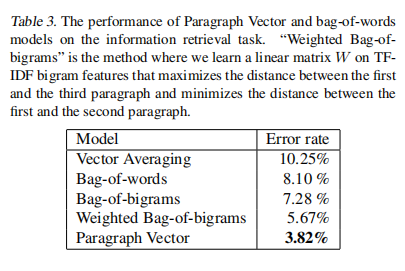

The results show that Paragraph Vector works well and gives a 32% relative improvement in terms of error rate. The fact that the paragraph vector method significantly outperforms bag of words and bigrams suggests that our proposed method is useful for capturing the semantics of the input text.

结果表明，分段向量算法的误码率相对提高了32%。段落向量方法的性能明显优于单词和双字母图，这表明我们的方法对于获取输入文本的语义是有用的。

## 3.4. Some further observations

## 3.4 进一步的观察



We perform further experiments to understand various aspects of the models. Here’s some observations 

我们进行了进一步的实验来理解模型的各个方面。这里有一些观察



• PV-DM is consistently better than PV-DBOW. PV-DM alone can achieve results close to many results in this paper (see Table 2). For example, in IMDB, PV-DM only achieves 7.63%. The combination of PV-DM and PV-DBOW often work consistently better (7.42% in IMDB) and therefore recommended. 

•PV-DM始终比PV-DBOW更好。单独使用PV-DM可以获得与本文很多结果相近的结果(见表2)，例如在IMDB中，PV-DM只能达到7.63%。PV-DM和PV-DBOW的组合通常效果更好(在IMDB中为7.42%)，因此推荐使用。



• Using concatenation in PV-DM is often better than sum. In IMDB, PV-DM with sum can only achieve 8.06%. Perhaps, this is because the model loses the ordering information. 

•在PV-DM中使用串联通常比求和更好。在IMDB中，PV-DM只有用sum才能实现8.06%。也许，这是因为模型丢失了订购信息。





• It’s better to cross validate the window size. A good guess of window size in many applications is between 5 and 12. In IMDB, varying the window sizes between 5 and 12 causes the error rate to fluctuate 0.7%. 

•最好交叉验证窗口大小。在许多应用程序中，窗口大小的猜测在5到12之间。在IMDB中，在5和12之间改变窗口大小会导致错误率波动0.7%。



• Paragraph Vector can be expensive, but it can be done in parallel at test time. On average, our implementation takes 30 minutes to compute the paragraph vectors of the IMDB test set, using a 16 core machine (25,000 documents, each document on average has 230 words).

•段落向量可能很昂贵，但可以在测试时并行完成。平均而言，我们的实现需要30分钟来计算IMDB测试集的段落向量，使用16核机器(25000个文档，每个文档平均有230个单词)。

# 4. Related Work

# 4. 相关工作



Distributed representations for words were first proposed in (Rumelhart et al., 1986) and have become a successful paradigm, especially for statistical language modeling (Elman, 1990; Bengio et al., 2006; Mikolov, 2012). Word vectors have been used in NLP applications such as word representation, named entity recognition, word sense disambiguation, parsing, tagging and machine translation (Collobert & Weston, 2008; Turney & Pantel, 2010; Turian et al., 2010; Collobert et al., 2011; Socher et al., 2011b; Huang et al., 2012; Zou et al., 2013).

单词的分布式表示最早是在(Rumelhart et al.， 1986)中提出的，并已成为一种成功的范式，特别是对于统计语言建模(Elman, 1990;Bengio等人，2006年;Mikolov, 2012)。词向量被用于自然语言处理应用，如单词表示、命名实体识别、词义消歧、解析、标注和机器翻译(Collobert & Weston, 2008;Turney & Pantel, 2010年;Turian等，2010年;Collobert等人，2011;Socher等，2011b;黄等，2012;邹等，2013)。



Representing phrases is a recent trend and received much attention (Mitchell & Lapata, 2010; Zanzotto et al., 2010; Yessenalina & Cardie, 2011; Grefenstette et al., 2013; Mikolov et al., 2013c). In this direction, autoencoder-style models have also been used to model paragraphs (Maas et al., 2011; Larochelle & Lauly, 2012; Srivastava et al., 2013).

代表短语是最近的趋势，并得到了很多关注(Mitchell & Lapata, 2010;赞佐托等人，2010年;Yessenalina & Cardie出版社，2011年;Grefenstette等人，2013年;Mikolov等，2013c)。在这个方向上，自动编码器样式的模型也被用于建模段落(Maas et al.， 2011;Larochelle & Lauly, 2012;Srivastava等人，2013)。



Distributed representations of phrases and sentences are also the focus of Socher et al. (Socher et al., 2011a;c; 2013b). Their methods typically require parsing and is shown to work for sentence-level representations. And it is not obvious how to extend their methods beyond single sentences. Their methods are also supervised and thus require more labeled data to work well. Paragraph Vector, in contrast, is mostly unsupervised and thus can work well with less labeled data.

短语和句子的分布式表示也是Socher等人关注的重点(Socher et al.， 2011a;c;2013 b)。它们的方法通常需要解析，并且可以用于句子级表示。如何将他们的方法扩展到单个句子之外，还不是很明显。他们的方法也受到监督，因此需要更多的标记数据才能正常工作。相反，段落向量是无监督的，因此可以很好地与较少标记的数据。



Our approach of computing the paragraph vectors via gradient descent bears resemblance to a successful paradigm in computer vision (Perronnin & Dance, 2007; Perronnin et al., 2010) known as Fisher kernels (Jaakkola & Haussler, 1999). The basic construction of Fisher kernels is the gradient vector over an unsupervised generative model.

我们通过梯度下降计算段落向量的方法与计算机视觉中的成功范例相似(Perronnin & Dance, 2007;Perronnin et al.， 2010)称为Fisher kernels (Jaakkola & Haussler, 1999)。Fisher核的基本构造是无监督生成模型上的梯度向量。

# 5. Discussion

# 5. 讨论



We described Paragraph Vector, an unsupervised learning algorithm that learns vector representations for variablelength pieces of texts such as sentences and documents. The vector representations are learned to predict the surrounding words in contexts sampled from the paragraph.

我们描述了段落向量，一种无监督学习算法，学习矢量表示的可变长度的文本，如句子和文档。矢量表示法被学习来预测从段落中取样的上下文中周围的单词。



Our experiments on several text classification tasks such as Stanford Treebank and IMDB sentiment analysis datasets show that the method is competitive with state-of-the-art methods. The good performance demonstrates the merits of Paragraph Vector in capturing the semantics of paragraphs. In fact, paragraph vectors have the potential to overcome many weaknesses of bag-of-words models.

我们在几个文本分类任务(如Stanford Treebank和IMDB情绪分析数据集)上的实验表明，该方法可以与最先进的方法相媲美。该算法的良好性能表明了段落向量在获取段落语义方面的优越性。事实上，段落向量有可能克服单词包模型的许多弱点。



Although the focus of this work is to represent texts, our method can be applied to learn representations for sequential data. In non-text domains where parsing is not available, we expect Paragraph Vector to be a strong alternative to bag-of-words and bag-of-n-grams models.

虽然这项工作的重点是表示文本，但我们的方法可以用于学习序列数据的表示。在无法进行解析的非文本领域，我们希望段落向量能够成为词袋和n-gram袋模型的强大替代方案。